Notre dataset est un fichier de la production assurance d'une compagnie d'assurance; il contient le détail des primes d'assurances émises par client et par agence;
Exemple de lecture par ligne:
dans une agence N°xxxxx, le jour du xxxx, Un client porte le N°xxxxx,  a souscrit un contrat d'assurance dans la catégorie /branche  N°xxxxxx, ayant comme détail la grappe/produit N°xxx et dont le numéro du contrat séquentiel n° xxxx.
Ledit contrat commence avec une date d'effet soit xx/xx/xxxx et ayant une date de fin/ échéance le xx/xx/xxxx, la prime d'assurance à payer par le client est de xxxxxx DA.


# Data preprocessing

In [ ]:
import pandas as pd
#Charger notre dataset
data = pd.read_excel('PRODUCTION_Detail_Contrats_Janvier_Septembre_2023_NonAuto.xlsx')
data.head() #Afficher les 5 premieres lignes

,CRMA,JOURNEE,ASSURE,GROUPE,GRAPPE,POLICENUMERO,DATEEFFET,DATEEXPIRATION,PRIMENETTE
0,CE01,2023-01-01,1.010000e+09,15,150,10115202300021,2023-01-01,2023-12-31,0.0
1,CE01,2023-05-30,1.010005e+09,15,150,10115202300067,2023-05-30,2024-05-29,0.0
2,CE01,2023-09-21,1.010048e+09,15,150,10115202300073,2023-09-21,2024-09-13,0.0
3,CE01,2023-02-12,1.050049e+09,15,150,10515202300001,2023-02-12,2024-02-11,1000.0
4,CE01,2023-04-25,1.010000e+09,15,150,10115202300023,2023-04-25,2023-12-31,11663.9


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146252 entries, 0 to 146251
Data columns (total 9 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   CRMA            146252 non-null  object        
 1   JOURNEE         146252 non-null  datetime64[ns]
 2   ASSURE          146251 non-null  float64       
 3   GROUPE          146252 non-null  int64         
 4   GRAPPE          146252 non-null  int64         
 5   POLICENUMERO    146252 non-null  object        
 6   DATEEFFET       146246 non-null  datetime64[ns]
 7   DATEEXPIRATION  146193 non-null  datetime64[ns]
 8   PRIMENETTE      146252 non-null  float64       
dtypes: datetime64[ns](3), float64(2), int64(2), object(2)
memory usage: 10.0+ MB


On utilise la fonction info() pour voir le nombre de données manquantes et pour assurer le bon type de data ; par exemple les dates sous format 'datetime64' .
On peut remarquer qu'il n'y a pas de probleme au niveau des types de données , mais par contre il y a des données manquantes

In [ ]:
#Les dimension de la dataset
data.shape

(146252, 9)

In [ ]:
#Le nombre de données manquantes dans chaque colonne
data.isna().sum()

CRMA               0
JOURNEE            0
ASSURE             1
GROUPE             0
GRAPPE             0
POLICENUMERO       0
DATEEFFET          6
DATEEXPIRATION    59
PRIMENETTE         0
dtype: int64

In [ ]:
#Supprimer les lignes dont il y a des données manquantes
data = data.dropna()
data.isna().sum() #Vérifier qu'il ne reste plus de données manquantes

CRMA              0
JOURNEE           0
ASSURE            0
GROUPE            0
GRAPPE            0
POLICENUMERO      0
DATEEFFET         0
DATEEXPIRATION    0
PRIMENETTE        0
dtype: int64

In [ ]:
#Le nombre de lignes doublées
data.duplicated().sum()

198

In [ ]:
#Supprimer les lignes doublées
data = data.drop_duplicates()
data.duplicated().sum() #Vérification

0

In [ ]:
#Dimension de dataset après les modifications
data.shape

(145994, 9)

In [ ]:
#Afficher une description statistique des données numériques
data.describe()

,ASSURE,GROUPE,GRAPPE,PRIMENETTE
count,1.459940e+05,145994.000000,145994.000000,1.459940e+05
mean,6.333559e+09,41.926689,568.828774,1.559931e+04
std,3.983719e+10,16.514271,295.534056,1.517595e+05
min,2.700000e+01,15.000000,150.000000,-3.114128e+06
25%,2.090013e+09,25.000000,251.000000,9.000000e+02
50%,2.930048e+09,50.000000,640.000000,1.653000e+03
75%,4.960009e+09,50.000000,905.000000,2.643750e+03
max,6.626000e+11,80.000000,906.000000,1.646832e+07


Après avoir faire le data cleaning en éliminant les valeurs manquantes et les dupliqués , et le data exploratory en utilisant des fonctions comme info() et describe() , nos données sont pretes a etre visualisées

In [ ]:
#On veut calculer la periode de chaque contrat
periode = data['DATEEXPIRATION'] - data['DATEEFFET']
periode


0        364 days
1        365 days
2        358 days
3        364 days
4        250 days
           ...   
146247   364 days
146248   181 days
146249   364 days
146250   364 days
146251   364 days
Length: 145994, dtype: timedelta64[ns]

In [ ]:
periode_contrat = periode.value_counts() #Calculer la fréquence de chaque période
periode_contrat.head(20) #afficher les 20 périodes plus fréquentes


365 days     100610
364 days      35919
366 days       1757
367 days        575
368 days        332
60 days         313
181 days        246
3652 days       223
183 days        206
363 days        203
238 days        175
369 days        147
232 days        132
362 days        128
223 days        120
91 days         117
89 days         106
152 days        102
340 days         97
357 days         87
dtype: int64

# Data visualisation

In [ ]:
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'Les periodes des contrats')

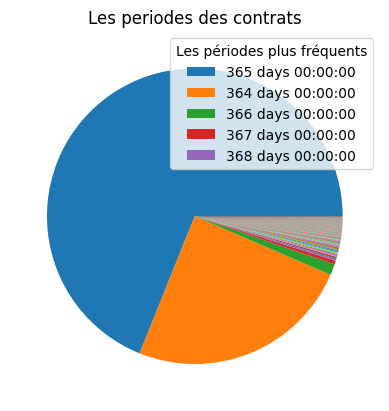

In [ ]:
periode_contrat.plot(kind='pie')
periode_dominante = periode_contrat.head(5)
plt.legend(title='Les périodes plus fréquents',labels=periode_dominante.index)
for text in plt.gca().texts:
    text.set_visible(False)
plt.title('Les periodes des contrats')


In [ ]:
percentages = [f"{p:.1f}%" for p in periode_dominante / periode_contrat.sum() * 100]
print("liste des pourcentage des 5 premiere periode basant sur la fréquence :", percentages)


liste des pourcentage des 5 premiere periode basant sur la fréquence : ['68.9%', '24.6%', '1.2%', '0.4%', '0.2%']


On peut remarquer que 68.9% des contrats ont une période de valabilité de 365 jours et 24.6% de 364 jours

In [ ]:
#Calculer le nombre d'opérations que chaque agence a fait
operation_per_company = data['CRMA'].value_counts()
operation_per_company

CE02    6363
CE13    5657
CE42    5263
CE51    5247
CE15    5026
        ... 
CE73     259
CE82     235
CE64     203
CE81     189
CE68     160
Name: CRMA, Length: 70, dtype: int64

Text(0.5, 1.0, 'Operations per company')

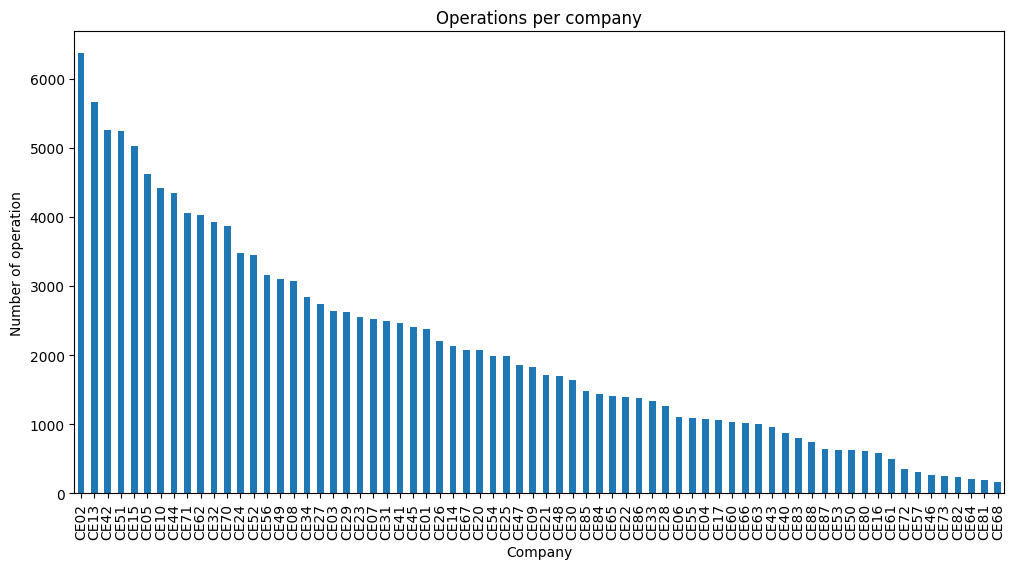

In [ ]:
#Visualiser les résultat (nombre d'operations pour chaque agence) avec des bars
plt.figure(figsize=(12,6))
operation_per_company.plot(kind ='bar')
plt.xlabel('Company')
plt.ylabel('Number of operation')
plt.title('Operations per company')

On remarque que les agences CE02 et CE13 ont le plus d'opérations tandis que les agence CE68 CE81.. ont le moins d'opérations

In [ ]:
#Calculer la somme des prime pour chaque agence
agence_grouped = data.groupby('CRMA')#On groupe d'abbord notre dataframe parrapport les agences
prime_sum_agence= agence_grouped['PRIMENETTE'].sum().sort_values(ascending=False)#On calcule la somme des primes en ordre ascendant
prime_sum_agence

CRMA
CE02    1.755963e+08
CE23    1.084510e+08
CE71    1.029832e+08
CE42    1.006265e+08
CE34    8.578926e+07
            ...     
CE57    4.355284e+06
CE83    3.543722e+06
CE80    2.825450e+06
CE68    1.022281e+06
CE64    9.262467e+05
Name: PRIMENETTE, Length: 70, dtype: float64

Text(0.5, 1.0, 'Somme des primes par agence')

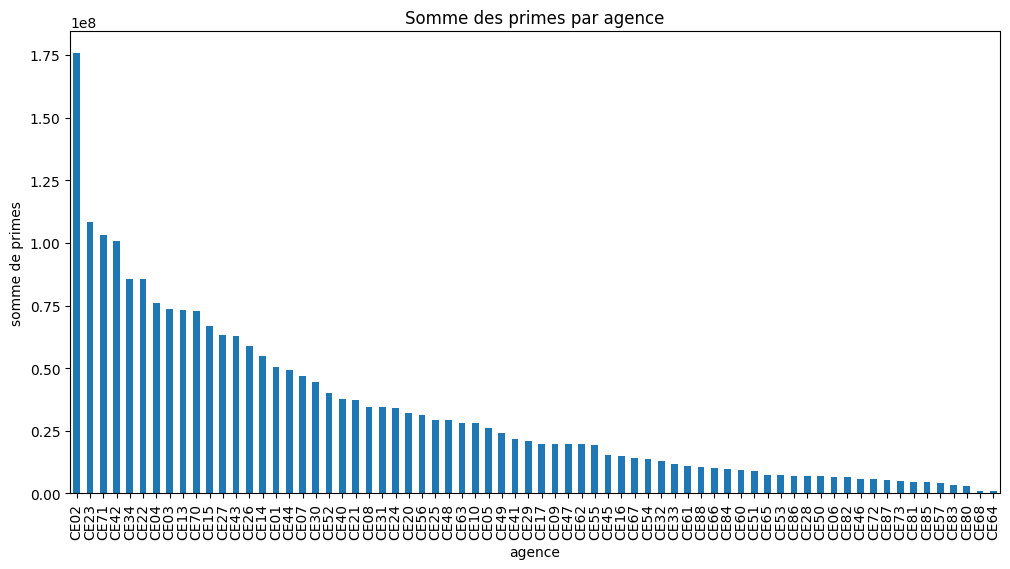

In [ ]:
#On visualise les résultats
plt.figure(figsize = (12,6))
prime_sum_agence.plot(kind = 'bar')
plt.xlabel('agence')
plt.ylabel('somme de primes')
plt.title('Somme des primes par agence')

On remarque que les agences CE02 et CE23 ont le max de primes et les agences CE68 et CE64 ont le min de primes , et que il y a une différence observable entre CE02 et CE23 . Il y a aussi une différence dans l'ordre des agences dans les deux visualisations qu'on a deja fait , ce qui veut dire que les revenues ne se raportent pas sur le nombre d'opérations seulement mais aussi sur le groupe le grappe...

In [ ]:
#Calculer la somme des primes pour chaque grappe
Grappe_grouped = data.groupby('GRAPPE')
prime_sum_grappe = Grappe_grouped['PRIMENETTE'].sum().sort_values(ascending=False)
prime_sum_grappe

GRAPPE
152    2.744154e+08
151    2.355575e+08
321    2.145212e+08
906    1.841967e+08
600    1.564118e+08
           ...     
901    4.000000e+03
253    3.836000e+03
333    2.864720e+03
900    2.593500e+03
258    1.800000e+03
Name: PRIMENETTE, Length: 69, dtype: float64

Text(0.5, 1.0, 'Somme des primes par produit')

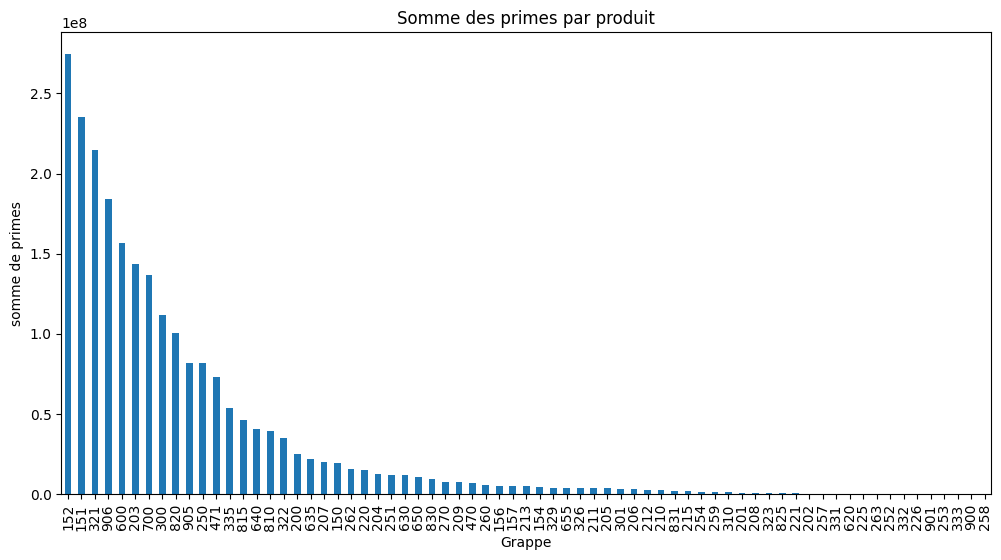

In [ ]:
#Visualiser les résultats
plt.figure(figsize = (12,6))
prime_sum_grappe.plot(kind = 'bar')
plt.xlabel('Grappe')
plt.ylabel('somme de primes')
plt.title('Somme des primes par produit')

On remarque que les produits 152,151,321 ont le plus de primes avec une somme plus que 235millionsDA (pour chacun)alors que les primes pour les produits 202 257 331 620 225 263 252 332 901 253 333 900 258 sont tres peu avec une somme moin que 10000DA

In [ ]:
#Calculer la somme des primes de chaque groupe
Groupe_grouped = data.groupby('GROUPE')
prime_sum_per_groupe = Groupe_grouped['PRIMENETTE'].sum().sort_values(ascending=False)
prime_sum_per_groupe

GROUPE
15    5.392471e+08
30    4.290985e+08
80    3.350010e+08
50    2.662428e+08
20    2.492260e+08
60    2.463854e+08
25    2.122044e+08
Name: PRIMENETTE, dtype: float64

Text(0.5, 1.0, 'Somme de primes par groupe')

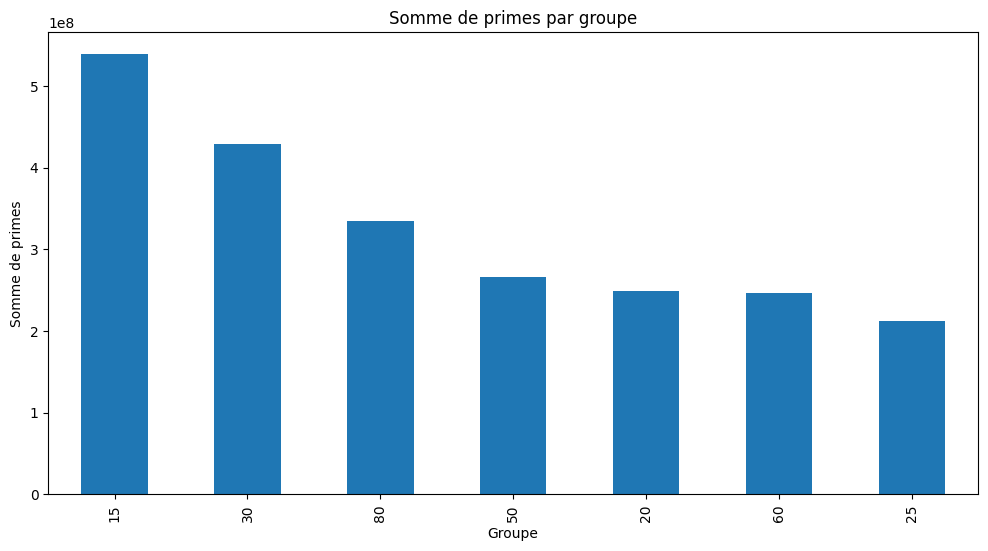

In [ ]:
plt.figure(figsize = (12,6))
prime_sum_per_groupe.plot(kind='bar')
plt.xlabel('Groupe')
plt.ylabel('Somme de primes')
plt.title('Somme de primes par groupe')

Le groupe qui a le maximum de revenue est le groupe 15 avec une somme de prime de 540millionsDA , et le groupe qui a le minimum de revenue est le groupe 25 avec une somme de primes 212millionsDA

In [ ]:
#Calculer la fréquence de chaque date d'expiration
dateexp = data['DATEEXPIRATION'].value_counts()
dateexp.head(20)

2023-12-31    8635
2024-09-17    1147
2024-09-18    1131
2024-09-23    1103
2024-02-29    1079
2024-01-31    1033
2024-09-24     978
2024-09-19     958
2024-09-13     953
2024-09-12     950
2024-09-16     942
2024-09-20     898
2024-09-25     896
2024-09-26     891
2023-10-30     863
2024-02-22     852
2024-02-20     828
2024-02-21     824
2024-09-11     818
2024-01-09     800
Name: DATEEXPIRATION, dtype: int64

Text(0.5, 1.0, "Distribustion de la date d'expiration")

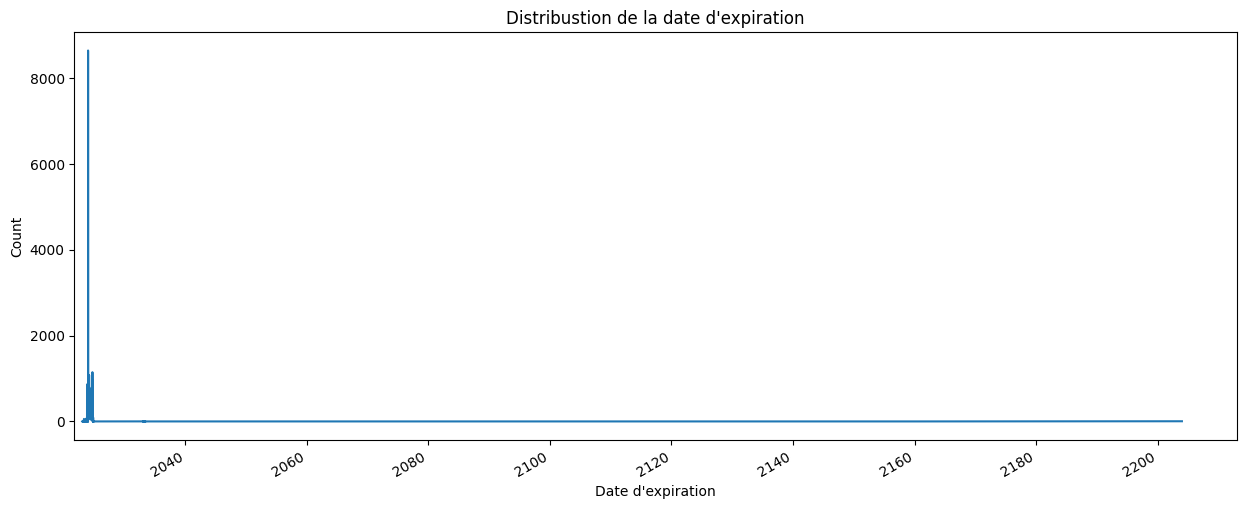

In [ ]:
plt.figure(figsize = (15,6))
dateexp.plot(kind='line')
plt.xlim(18900,88769.75)
plt.xlabel("Date d'expiration")
plt.ylabel('Count')
plt.title("Distribustion de la date d'expiration")

La visualisation obtenue n'est pas assez précise car le domaine des date d'expiration est tres large , mais on peut remarque que la plupart des contrats vont expirer dans les deux années 2023 ET 2024 et que la date pic est 2023-12-31

In [ ]:
#On fait la meme chose pour la date d'effet
dateeffet = data['DATEEFFET'].value_counts()
dateeffet.head(20)

2023-01-01    6638
2023-09-18    1165
2023-09-19    1153
2023-09-24    1126
2023-03-01    1124
2023-09-14    1123
2023-02-01    1097
2023-09-25    1012
2023-09-20     990
2023-09-17     960
2023-09-13     952
2023-01-03     952
2023-09-21     929
2023-09-26     911
2023-09-27     911
2023-03-06     902
2023-02-23     869
2023-01-15     855
2023-01-09     848
2023-02-22     830
Name: DATEEFFET, dtype: int64

Text(0.5, 1.0, "Distribution de la date d'effet")

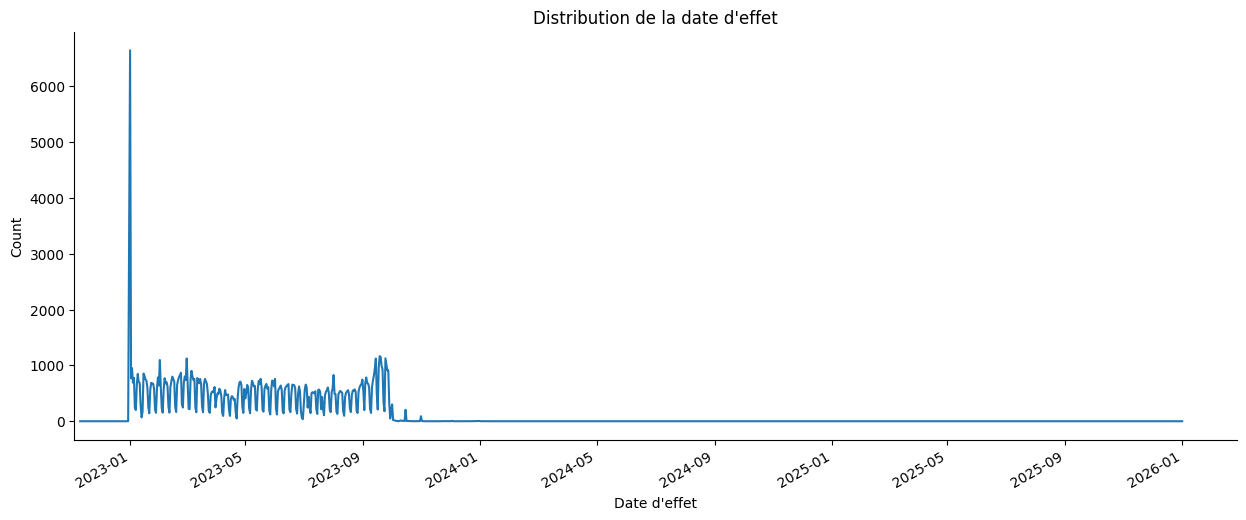

In [ ]:
plt.figure(figsize = (15,6))
dateeffet.plot(kind='line')
plt.gca().spines[['top', 'right']].set_visible(False)
plt.xlim(19300,20511)
plt.xlabel("Date d'effet")
plt.ylabel("Count")
plt.title("Distribution de la date d'effet")

Contrairement à la date d'expiration , le domaine des date d'effet et plus petit se qui résulte une visualisation plus claire et plus de détails . On peut remarquer que les date d'effet sont centralisées surtout dans la période de 2023-01 et 2023-10 et que le pic est dans le jour 2023-01-01

In [ ]:
#On fait la meme chose pour la journée
journee = data['JOURNEE'].value_counts()
journee

2023-01-01    4563
2023-09-24    1428
2023-09-17    1354
2023-01-02    1293
2023-09-13    1217
              ... 
2023-04-28       1
2023-06-16       1
2023-05-05       1
2023-08-18       1
2023-08-11       1
Name: JOURNEE, Length: 257, dtype: int64

Text(0.5, 1.0, "Distribution des journée d'opérations")

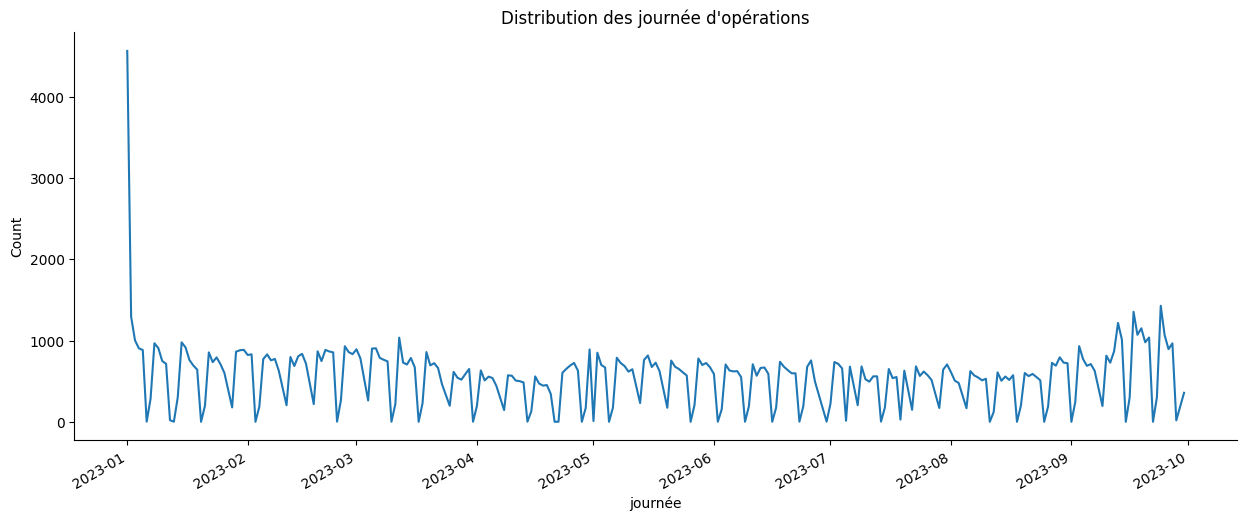

In [ ]:
plt.figure(figsize = (15,6))
journee.plot(kind='line')
plt.gca().spines[['top', 'right']].set_visible(False)

plt.xlabel("journée")
plt.ylabel("Count")
plt.title("Distribution des journée d'opérations")

On remarque que les journées sont presque égales mis à part la journée 1-1-2023 ou il y avait un grand nombre d'opérations

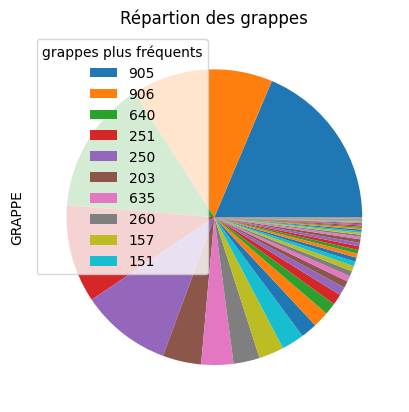

In [ ]:
#Répartition des grappes
Grappe = data['GRAPPE'].value_counts()
Grappe.plot(kind='pie')
plt.title('Répartion des grappes')
plt.legend(title='grappes plus fréquents',labels=Grappe.head(10).index,loc = 'upper left')
for text in plt.gca().texts:
    text.set_visible(False)

In [ ]:
print('Les 5 grappes plus fréquents :\n')
grappe_plus_frequent = Grappe.head(5)
print(grappe_plus_frequent)
percentage = [f"{p:.1f}%" for p in  grappe_plus_frequent/ Grappe.sum() * 100]
print("Les pourcentages:", percentage)
print('Les 5 grappes plus fréquents :\n')
grappe_moins_frequent = Grappe.tail(5)
print(grappe_moins_frequent)
pourcentage = [f"{p:.1f}%" for p in  grappe_moins_frequent/ Grappe.sum() * 100]
print("les pourcentages:", pourcentage)

Les 5 grappes plus fréquents :

905    27222
906    22571
640    21307
251    15655
250    14501
Name: GRAPPE, dtype: int64
Les pourcentages: ['18.6%', '15.5%', '14.6%', '10.7%', '9.9%']
Les 5 grappes plus fréquents :

332    1
331    1
253    1
900    1
226    1
Name: GRAPPE, dtype: int64
les pourcentages: ['0.0%', '0.0%', '0.0%', '0.0%', '0.0%']


On peut voir que les grappes le plus demandés sont 905 906 640 251 250 et les moins demandées sont 332 331 253 900 226

Text(0.5, 1.0, 'Répartition des groupes')

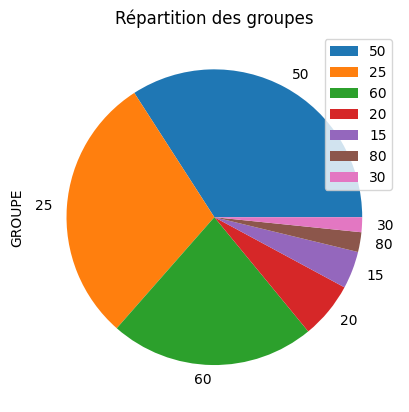

In [ ]:
#Répartition des groupes
Groupe = data['GROUPE'].value_counts()
Groupe.plot(kind='pie')
plt.legend()
plt.title('Répartition des groupes')

In [ ]:
#CRéer un pivot table
tcd = pd.pivot_table(data, values='PRIMENETTE', index=['GROUPE', 'GRAPPE'], aggfunc='sum')
tcd

PRIMENETTE
GROUPE GRAPPE              
15     150     1.919533e+07
       151     2.355575e+08
       152     2.744154e+08
       154     4.815311e+06
       156     5.263563e+06
...                     ...
80     815     4.618948e+07
       820     1.006974e+08
       825     5.625957e+05
       830     9.348046e+06
       831     1.977492e+06

[69 rows x 1 columns]

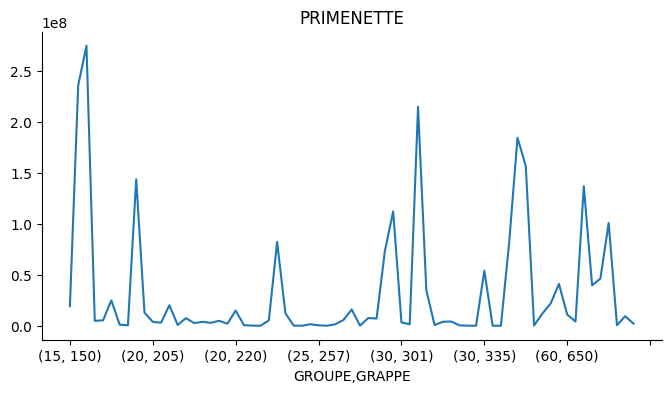

In [ ]:
from matplotlib import pyplot as plt
tcd['PRIMENETTE'].plot(kind='line', figsize=(8, 4), title='PRIMENETTE')
plt.gca().spines[['top', 'right']].set_visible(False)

On peut voir que la combinaison (15,152) a le revenue le plus élevé de 274415353.41DA

In [ ]:
client = data['ASSURE'].value_counts()
client

1.690088e+09    342
1.700081e+09    144
2.340032e+09    119
1.060010e+09    112
2.060000e+09    108
               ... 
2.090031e+09      1
2.090026e+09      1
2.090014e+09      1
2.090017e+09      1
8.780006e+09      1
Name: ASSURE, Length: 115658, dtype: int64

In [ ]:
client_grouped = data.groupby('ASSURE')
client_prime = client_grouped['PRIMENETTE'].sum().sort_values(ascending = False)
client_prime

ASSURE
1.060010e+09    57945122.43
2.020020e+09    44647847.16
1.300035e+09    32260728.00
2.140020e+09    27605591.09
2.690044e+09    26459807.39
                   ...     
1.620038e+09     -161091.93
2.490014e+09     -182453.53
2.490015e+09     -352806.52
2.020020e+09     -366582.18
7.330001e+09     -582472.22
Name: PRIMENETTE, Length: 115658, dtype: float64

D'après les résultats , les clients portant les numéros : 1060010074, 2020019744, 1300035369, 2140019872,2690043819 Sont les clients avec une somme de prime plus élevée

Conclusion et résumé des résultats :


*   Plusieurs parametres influent sur les revenues d'une agence : Les groupe , les grappe , la periode des contrats ...etc
*   L'agence CE02 a marqué le plus grand revenue de 175millions DA
*   Le grappe 152 a marqué le plus grand revenue plus que 235millions DA , alors que la grappe 905 est la plus demandée avec un pourcentage 18.6%
*  Le groupe qui a le maximum de revenue est le groupe 15 avec une somme de prime de 540millionsDA , le groupe le plus demandé est 50
*   La combinaison groupe,grappe qui a eu le revenue le plus élevé est (15,152)
*   La journée qui a marqué le maximum d'opération est la premiere journée de l'année 2023 , cette journée a eu le maximum de dates d'effet
*   la plupart des contrats vont expirer dans les deux années 2023 ET 2024 et que la date pic est 2023-12-31
*   Les agence CE02 CE13 ont marqué le plus grand nombre d'opérations
*   68.9% des contrats ont une periode de valabilité de 365 jours
*   On peut dire que les clients 1060010074, 2020019744, 1300035369, 2140019872,2690043819 sont les top clients car il ont les sommes de primes les plus élevées










